In [1]:
import lobi as lb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import os
import serial
from tqdm import tqdm

### Git pull?
- Start auf Windows: python -m jupyterlab

## Messung
    - Ordner erstellen mit Name der Messung

In [2]:
#Globale Angaben einer Messreihe
Messung    = 'Test'
Elektroden = 32
Modus      = 'e'
Anzahl     = 3 #Anzahl der aufgenommenen Messwerte

In [3]:
#lb.gen_env(Messung,Elektroden,Modus)

### Herstellen der Verbindung zum Spectra EIT-Kit

In [4]:
serialPort = lb.init("COM7")

Verbindung zu: COM7 erfolgreich hergestellt.


### Messung für `Anzahl` an Werten starten

In [ ]:
Data = lb.measure_data(Anzahl,serialPort)

Vorgang:  1 von:  3
Vorgang:  2 von:  3


In [11]:
MxN = np.zeros((2,5))
MxN[0,1:]

array([0., 0., 0., 0.])

In [14]:
MxN[1,1:5]

array([0., 0., 0., 0.])

In [6]:
"""
Wird solange ausgeführt, bis die vorgegebene Anzahl an Messwerten erreicht ist.
"""
RAW = []
cnt = 0
while cnt < Anzahl:
    print("Vorgang: ",cnt+1,"von: ",Anzahl)
    line = serialPort.readline().decode("utf-8")
    line = lb.parse_line(line)
    if len(line) == 192:
        print(line)
        RAW.append(line)
        cnt = cnt+1

Vorgang:  1 von:  3
[14882.625   4765.6875  3288.625   2756.1875  2209.75    2232.5
  1747.4375  1833.25    3421.25    1948.9375  2192.75    2165.4375
 12698.1875  5408.3125  4271.5625  3687.625   3724.8125  3772.375
  3115.9375  4915.3125  3308.6875  3599.4375  3577.25    2109.875
  3557.8125 13324.125   4868.625   3577.25    3354.6875  3321.1875
  3445.3125  4896.625   3226.6875  3341.875   3321.1875  3121.0625
  2206.9375  2062.375   8908.5     2450.1875  1948.9375  1929.4375
  1705.0625  1715.875   2440.75    1929.4375  1664.5625  1802.8125
  4058.0625  4503.75    3818.6875 10968.9375  4691.1875  4380.375
  3741.      3826.625   3490.4375  4058.875   3943.1875  4138.125
  2962.1875  3276.1875  3374.1875  2833.375   8247.375   3726.375
  2797.5625  2842.375   2583.25    4465.      4946.625   3304.5625
  2984.875   3341.875   3308.6875  3485.75    3038.1875  9136.875
  3211.25    2853.5     2835.5625  4713.5     3065.5     3410.125
  2445.4375  2766.6875  2728.625   2739.0625  2943.9

In [13]:
len(lb.reconstruct_data(5)[2])

193

In [228]:
line = serialPort.readline().decode("utf-8")

In [229]:
line

'magnitudes:    14882.6250,    4937.1875,    3276.1875,    2756.1875,    2209.7500,    2232.5000,    2017.7500,    1844.0625,    3481.1250,    1941.3750,    2179.0000,    2165.4375,   12698.1875,    5408.3125,    4480.0000,    3687.6250,    3724.8125,    3787.1875,    3115.9375,    5035.5000,    3329.1875,    3673.5000,    3541.7500,    2109.8750,    3686.3125,   13324.1250,    4868.6250,    3673.5000,    3591.0000,    3308.6875,    3687.9375,    4896.6250,    3308.6875,    3341.8750,    3329.1875,    3137.1875,    2194.9375,    2062.3750,    9052.1875,    2459.5625,    1948.9375,    1929.4375,    1705.0625,    1705.0625,    2435.1250,    1941.3750,    1670.9375,    1802.8125,    4058.0625,    4503.7500,    3823.0000,   10968.9375,    4915.3125,    4380.3750,    3741.0000,    4051.0000,    3695.0625,    4058.8750,    4058.8750,    4138.1250,    2962.1875,    3207.2500,    3374.1875,    2829.8750,    8247.3750,    3726.3750,    2808.5625,    2842.3750,    2542.5,    3555.0625,    3650.3

In [232]:
lb.parse_line(line)

array([14882.625 ,  4937.1875,  3276.1875,  2756.1875,  2209.75  ,
        2232.5   ,  2017.75  ,  1844.0625,  3481.125 ,  1941.375 ,
        2179.    ,  2165.4375, 12698.1875,  5408.3125,  4480.    ,
        3687.625 ,  3724.8125,  3787.1875,  3115.9375,  5035.5   ,
        3329.1875,  3673.5   ,  3541.75  ,  2109.875 ,  3686.3125,
       13324.125 ,  4868.625 ,  3673.5   ,  3591.    ,  3308.6875,
        3687.9375,  4896.625 ,  3308.6875,  3341.875 ,  3329.1875,
        3137.1875,  2194.9375,  2062.375 ,  9052.1875,  2459.5625,
        1948.9375,  1929.4375,  1705.0625,  1705.0625,  2435.125 ,
        1941.375 ,  1670.9375,  1802.8125,  4058.0625,  4503.75  ,
        3823.    , 10968.9375,  4915.3125,  4380.375 ,  3741.    ,
        4051.    ,  3695.0625,  4058.875 ,  4058.875 ,  4138.125 ,
        2962.1875,  3207.25  ,  3374.1875,  2829.875 ,  8247.375 ,
        3726.375 ,  2808.5625,  2842.375 ,  2542.5   ,  3555.0625,
        3650.3125,  3780.1875,  2768.75  ,  3125.125 ,  3109.5

In [205]:
len(temp)

201

In [220]:
for ele in temp:
    print(float(ele.strip()))
#temp[0].strip()

15024.5625
4937.1875
3389.8125
2756.1875
2209.75
2232.5
1747.4375
1833.25
3407.875
1948.9375
2179.0
2179.0
12698.1875
5408.3125
4480.0
3687.625
3724.8125
3772.3
2179.0
2165.4375
12698.1875
5408.3125
4271.5625
3687.625
3724.8125
3787.1875
3115.9375
4896.625
3329.1875
3696.3125
3541.75
2109.875
3557.8125
13324.125
4868.625
3555.0625
3375.6875
3321.1875
3687.9375
4896.625
3239.0625
3341.875
3239.0625
3121.0625
2194.9375
2062.375
9052.1875
2459.5625
1948.9375
1941.375
1711.6875
1705.0625
2450.1875
1941.375
1664.5625
1802.8125
4058.0625
4503.75
3834.4375
10968.9375
4691.1875
4380.375
3741.0
3826.625
3695.0625
4058.875
4017.8125
4122.5
2943.9375
3207.25
3152.125
2833.375
8247.375
3726.375
2797.5625
2842.375
2592.625
4494.125
4896.625
3081.5625
3003.5
3271.5
3308.6875
3256.375
3112.3125
9101.8125
3190.375
3097.375
2825.25
4605.125
3065.5
3423.375
2445.4375
2712.8125
2728.625
2749.375
2926.0625
2301.25
4835.875
3364.0625
2536.75
4024.6875
2519.5625
2751.1875
1670.9375
2157.1875
2247.0625
1740.

ValueError: could not convert string to float: ''

In [203]:
temp

['    15024.5625',
 '    4937.1875',
 '    3389.8125',
 '    2756.1875',
 '    2209.7500',
 '    2232.5000',
 '    1747.4375',
 '    1833.2500',
 '    3407.8750',
 '    1948.9375',
 '    2179.0000',
 '    2179.0000',
 '   12698.1875',
 '    5408.3125',
 '    4480.0000',
 '    3687.6250',
 '    3724.8125',
 '    3772.3',
 '    2179.0000',
 '    2165.4375',
 '   12698.1875',
 '    5408.3125',
 '    4271.5625',
 '    3687.6250',
 '    3724.8125',
 '    3787.1875',
 '    3115.9375',
 '    4896.6250',
 '    3329.1875',
 '    3696.3125',
 '    3541.7500',
 '    2109.8750',
 '    3557.8125',
 '   13324.1250',
 '    4868.6250',
 '    3555.0625',
 '    3375.6875',
 '    3321.1875',
 '    3687.9375',
 '    4896.6250',
 '    3239.0625',
 '    3341.8750',
 '    3239.0625',
 '    3121.0625',
 '    2194.9375',
 '    2062.3750',
 '    9052.1875',
 '    2459.5625',
 '    1948.9375',
 '    1941.3750',
 '    1711.6875',
 '    1705.0625',
 '    2450.1875',
 '    1941.3750',
 '    1664.5625',
 '    1802.8

In [188]:
a = []

In [192]:
a.append(1)
a

[1, 1, 1]

In [169]:
temp = temp.split(",")

In [187]:
len(temp)

194

In [176]:
for ele in temp:
    ele

In [156]:
temp = temp.split(":",1)
len(temp)

AttributeError: 'list' object has no attribute 'split'

In [155]:
temp.split(",")

AttributeError: 'list' object has no attribute 'split'

In [145]:
temp = temp[1].strip()

In [146]:
float(temp)

ValueError: could not convert string to float: '15176.8750,    4937.1875,    3615.0000,    2756.1875,    2209.7500,    2232.5000,    2017.7500,    1833.2500,    3481.1250,    1948.9375,    2179.0000,    2165.4375,   12698.1875,    5493.5625,    4480.0000,    3687.6250,    3701.5000,    3787.1875,    3115.9375,    5035.5000,    3308.6875,    3673.5000,    3555.0625,    2158.0000,    3672.8125,   13474.0000,    4868.6250,    3637.0625,    3591.0000,    3555.0625,    3664.5000,    4896.6250,    3308.6875,    3341.8750,    3308.6875,    3121.0625,    2405.3125,    2062.3750,    9052.1875,    2459.5625,    1948.9375,    1929.4375,    1705.0625,    1705.0625,    2659.0000,    1941.3750,    1654.3750,    1792.5625,    4163.5000,    4487.3750,    3807.4375,   11163.2500,    4915.3125,    4380.3750,    3741.0000,    4040.3125,    3695.0625,    4058.8750,    4033.1250,    4138.1250,    2943.9375,    3276.1875,    3374.1875,    2833.3750,    8385.5000,    3826.6250,    2808.5625,    2842.3750,    2583.2500,    4494.1250,    4946.6250,    3284.0625,    2984.8750,    3354.6875,    3308.6875,    3464.8750,    3097.6875,    9250.0000,    3121.5000,    3089.2500,    2825.2500,    4682.9375,    3145.1250,    3423.3750,    2445.4375,    2739.0625,    2728.6250,    2996.0625,    2936.9375,    2361.0000,    4954.1250,    3364.0625,    2536.7500,    4116.5000,    2751.1875,    2795.1875,    1670.9375,    2135.7500,    2247.0625,    1740.5625,    1711.6875,    1734.0625,    5139.5625,    1815.9375,    3421.2500,    1740.5625,    1740.5625,    1722.6250,    1694.2500,    1729.2500,    1747.4375,    1601.3125,    1512.2500,    2106.2500,    4249.6875,    3664.5000,    1963.8750,    1694.2500,    1976.5000,    2046.8750,    2797.5625,    3190.3750,    3142.1250,    2883.4375,    2834.8750,    3157.2500,    2596.7500,    8139.3125,    6979.6875,    3555.0625,    3724.8125,    3780.1875,    2751.1875,    3125.1250,    3109.5625,    2808.5625,    2853.5,    2808.5625,    3077.2500,    2984.8750,    2862.5625,    7696.3750,    3884.4375,    4817.6250,    3866.8750,    2795.1875,    3338.3125,    3418.9375,    3109.5625,    3109.5625,    3443.6875,    3077.2500,    2804.9375,    5312.8125,    9547.1875,    5679.2500,    4732.0625,    3022.5625,    3304.5625,    3271.5000,    3650.3125,    3097.3750,    3211.2500,    2797.5625,    3031.8125,    3225.4375,    4212.6250,    8885.3750,    5426.1250,    3003.5000,    3291.8125,    3259.0625,    3375.6875,    3087.0625,    3443.6875,    2723.1250,    3231.3125,    3125.8750,    5780.1250,    4051.8750,   13773.0625,    2685.6250,    2728.6250,    2943.9375,    3003.5000,    2784.3750,    2795.1875,    2470.6250,    2739.0625,    2681.8125,    4678.1875,    3319.8125,    2926.5625,'

In [136]:
if temp[0] == 'magnitudes':
    print("Hallo")

Hallo


In [78]:
#lb.bytes_to_list(RAW)
Raw = np.array(RAW)
Data = []
for i in range(len())


    temp = Raw[i].decode("utf-8").split(',')
    Data.append(temp

In [107]:
temp = RAW[1].decode("utf-8")

In [118]:
temp.split(":", 1)[1][:]

'    15176.8750,    4909.1250,    3601.3750,    2784.3750,    2209.7500,    2232.5000,    2017.7500,    1833.2500,    3481.1250,    1948.9375,    2187.2500,    2165.4375,   12698.1875,    5376.2500,    4480.0000,    3687.6250,    3724.8125,    3787.1875,    3115.9375,    5048.1250,    3541.7500,    3687.6250,    3637.0625,    2104.8125,    3672.8125,   13474.0000,    4868.6250,    3650.7500,    3591.0000,    3321.1875,    3664.5000,    4896.6250,    3308.6875,    3577.2500,    3329.1875,    3121.0625,    2405.3125,    2056.7500,    9052.1875,    2459.5625,    1948.9375,    1929.4375,    1711.6875,    1711.6875,    2435.1250,    1941.3750,    1664.5625,    1802.8125,    4163.5000,    4487.3750,    3823.0000,   11121.9375,    4915.3125,    4380.3750,    3741.0000,    4066.9375,    3660.1875,    4291.0000,    4033.1250,    4138.1250,    2943.9375,    3276.1875,    3374.1875,    2833.3750,    8385.5000,    3826.6250,    2797.5625,    3097.3750,    2592.6250,    4494.1250,    4946.6250,    

In [72]:
S=s.split(',')

In [77]:
S[0]

'    3190.3750'

In [ ]:
.split

In [18]:
type(RAW[0])

numpy.bytes_

In [61]:
a=RAW[0]

In [6]:
#DIR = Messung+'/info.txt'
DIR = 'test.txt'
FILE = open(DIR, "w")
for ele in RAW:
    print(str(ele))
    FILE.write(str(ele)) 

b'    3190.3750,    3109.5625,    2825.2500,    4713.5000,    3125.1250,    3423.3750,    2445.4375,    2739.0625,    2955.0000,    2996.0625,    2936.9375,    2361.0000,    4923.5625,    3364.0625,    2536.7500,    4116.5000,    2751.1875,    2795.1875,    1670.9375,    2157.1875,    2247.0625,    1740.5625,    1711.6875,    1740.1875,    5139.5625,    1815.9375,    3421.2500,    1729.2500,    1740.5625,    1740.5625,    1694.2500,    1996.8125,    1740.5625,    1601.3125,    1512.2500,    2099.1250,    4363.6250,    3763.1250,    1963.8750,    1694.2500,    1976.5000,    2279.5625,    2797.5625,    3190.3750,    3129.9375,    2838.0000,    2808.5625,    3421.2500,    2610.7500,    8139.3125,    6779.3125,    3555.0625,    3724.8125,    3780.1875,    2751.1875,    3125.1250,    3109.5625,    2808.5625,    2853.5000,    3077.2500,    2996.0625,    2862.5625,    7713.3750,    3985.3750,    4817.6250,    4066.9375,    3046.0000,    3338.3125,    3418.9375,    3109.5625,    3190.3750,    

In [103]:
AW = (serialPort.readline())

In [107]:
type(AW)

bytes

In [108]:
def parse_line(line):
    try:
        _, data = line.split(":", 1)
    except ValueError:
        return None
    items = []
    for item in data.split(","):
        item = item.strip()
        if not item:
            continue
        try:
            items.append(float(item))
        except ValueError:
            return None
    return np.array(items)

In [109]:
parse_line(AW)

TypeError: a bytes-like object is required, not 'str'

In [40]:
lines = serialPort.readline()

### Ground truth

In [5]:
A = lb.generate_data(10)

Bild gespeichert


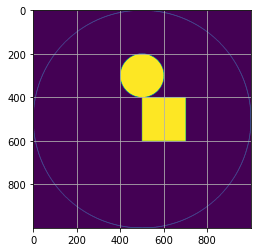

In [6]:
img1 = lb.ground_truth(['rectangle','circle'],[25,50],[0,3*np.pi/2], Messung ,save_img=True)
plt.grid()
plt.imshow(img1,cmap='viridis')